In [9]:
#import Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

#Loding Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x )

In [10]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] =='United States')].copy()

df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

#df_DA_US['salary_year_avg'].sample(10)

In [11]:
df_DA_US.explode('job_skills')

df_DA_US[['salary_year_avg','job_skills']]


,salary_year_avg,job_skills
109,89000.0,"[python, r, alteryx, tableau]"
180,90250.0,"[excel, powerpoint]"
410,133285.0,"[sql, word, excel, visio, powerpoint, sharepoint]"
988,62623.0,"[sql, excel, tableau]"
1413,71300.0,"[sql, excel, power bi]"
...,...,...
782637,70000.0,"[vba, sql, sql server]"
782798,111175.0,[terminal]
783588,125000.0,"[sql, r, python, hadoop, excel]"
783866,115000.0,[unix]


In [17]:
df_DA_US = df_DA_US.explode('job_skills')


In [26]:
df_DA_US_group = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count','median'])
df_DA_top_pay = df_DA_US_group.sort_values(by='median', ascending=False).head(10)
df_DA_skills = df_DA_US_group.sort_values(by='count',ascending=False).head(10)
df_DA_skills

,count,median
job_skills,,
sql,2508,91000.00
excel,1808,84392.00
python,1431,97500.00
tableau,1364,92875.00
sas,926,90000.00
r,893,92500.00
power bi,838,90000.00
powerpoint,462,85000.00
word,461,81194.75


<Axes: ylabel='job_skills'>

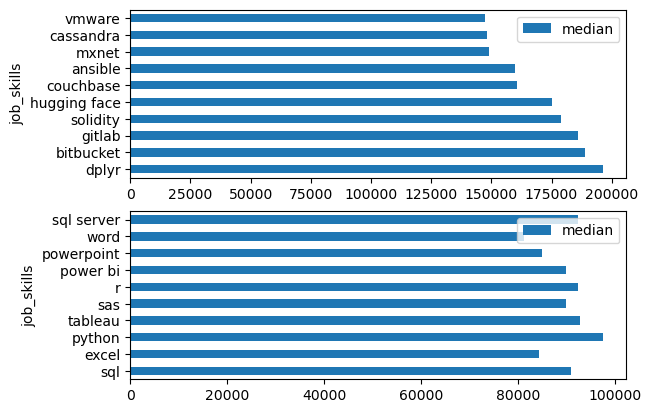

In [25]:
fig, ax = plt.subplots(2,1)
df_DA_top_pay.plot(kind='barh', y='median',ax=ax[0])
df_DA_skills.plot(kind='barh', y='median',ax=ax[1])

In [28]:
import seaborn as sns

<Axes: xlabel='median', ylabel='job_skills'>

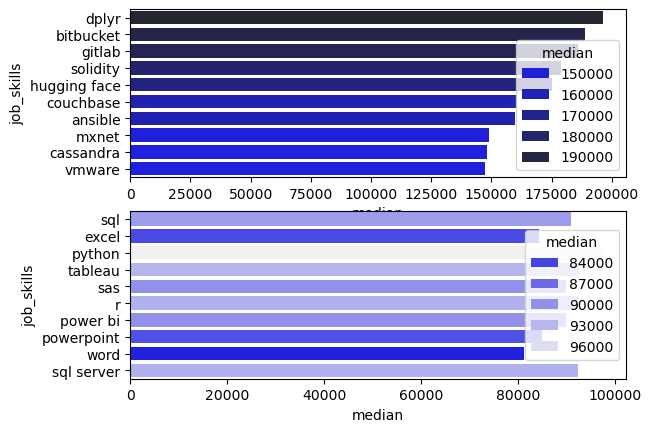

In [36]:
fig,ax = plt.subplots(2,1)

sns.barplot(data=df_DA_top_pay,x='median',y=df_DA_top_pay.index,ax=ax[0], hue='median',palette='dark:b_r')

sns.barplot(data=df_DA_skills,x='median',y=df_DA_skills.index,ax=ax[1],hue='median',palette='light:b_r')